# Metropolis-Hastings example


## Default target distribution example

### Load libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'library')))

from mcmc_utils import target_distribution, proposal_distribution
from mcmc_algorithms import metropolis_hastings

### Run the model

In [20]:
# Parameters
initial_value = 0.0
num_iterations = 20000
burn_in = 1000
thin = 1
seed = 42
credible_interval = 0.95

# Use default target distribution (standard normal)
target_dist = target_distribution()

# Run MCMC sampler with progress bar
samples, elapsed_time, acceptance_rate, mean, median, ci = metropolis_hastings(
    target_dist,
    proposal_distribution,
    initial_value,
    num_iterations,
    burn_in=burn_in,
    thin=thin,
    seed=seed,
    credible_interval=credible_interval
)

Sampling: 100%|██████████| 21000/21000 [00:10<00:00, 1943.63iteration/s, acceptance_rate=0.708]


### Summary

In [21]:
# Print statistics
print(f"Time taken: {elapsed_time:.2f} seconds")
print(f"Acceptance rate: {acceptance_rate:.2%}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"{credible_interval*100:.0f}% Credible Interval: ({ci[0]:.4f}, {ci[1]:.4f})")

Time taken: 10.81 seconds
Acceptance rate: 70.84%
Mean: 0.0120
Median: -0.0092
95% Credible Interval: (-1.9130, 2.0070)


### Plots

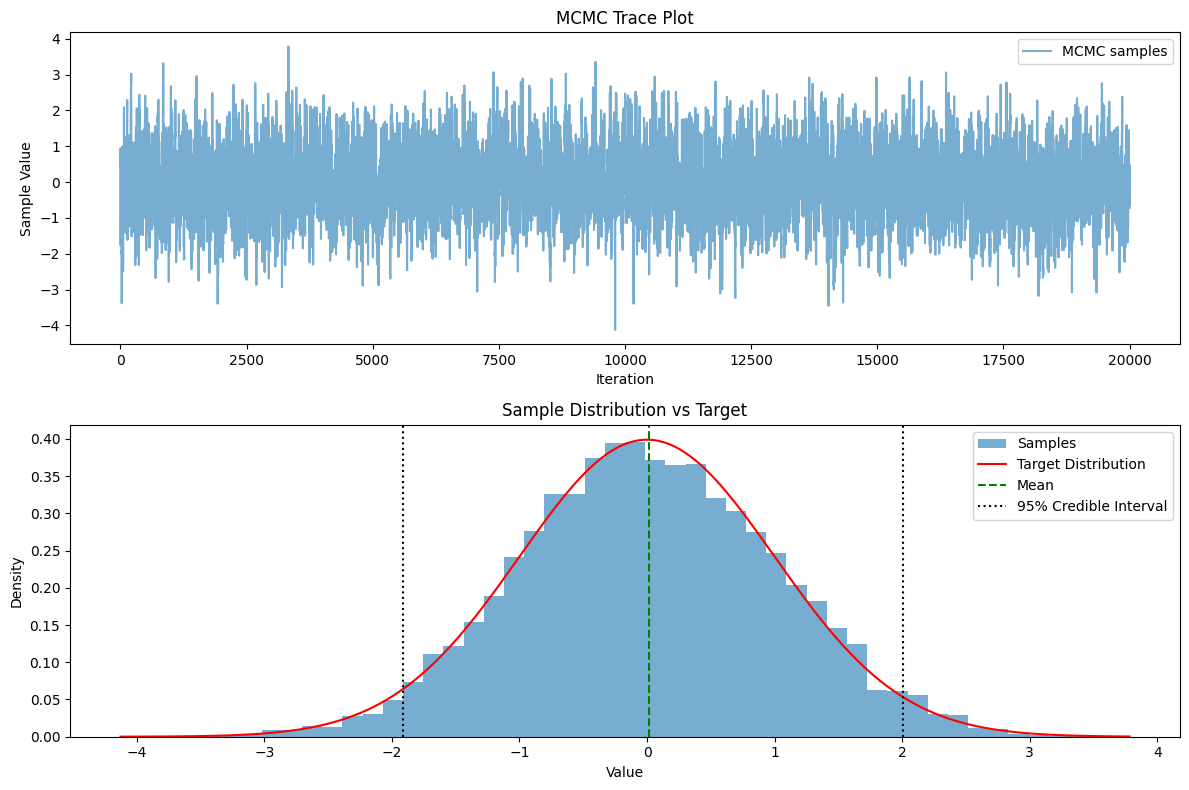

In [22]:
# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Trace plot
ax1.plot(samples, alpha=0.6, label='MCMC samples')
ax1.set_title('MCMC Trace Plot')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Sample Value')
ax1.legend()

# Histogram with target distribution
x = np.linspace(min(samples), max(samples), 1000)
target_values = [target_dist(xi) for xi in x]

ax2.hist(samples, bins=50, density=True, alpha=0.6, label='Samples')
ax2.plot(x, target_values, 'r-', label='Target Distribution')
ax2.axvline(mean, color='g', linestyle='--', label='Mean')
ax2.axvline(ci[0], color='k', linestyle=':', 
            label=f'{credible_interval*100:.0f}% Credible Interval')
ax2.axvline(ci[1], color='k', linestyle=':')
ax2.set_title('Sample Distribution vs Target')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()

## Custom target distribution example

### Run the model

In [23]:
# Define a custom target distribution (bimodal)
expression = '0.3 * exp(-0.5 * x**2) / sqrt(2 * pi) + 0.7 * exp(-0.5 * (x - 3)**2) / sqrt(2 * pi)'
target_dist_custom = target_distribution(expression)

# Run sampler with custom distribution
samples_custom, elapsed_time, acceptance_rate, mean, median, ci = metropolis_hastings(
    target_dist_custom,
    proposal_distribution,
    initial_value,
    num_iterations,
    burn_in=burn_in,
    thin=thin,
    seed=seed,
    credible_interval=credible_interval
)

Sampling: 100%|██████████| 21000/21000 [00:11<00:00, 1808.71iteration/s, acceptance_rate=0.79] 


### Summary

In [24]:
# Display results for custom distribution
print(f"Custom distribution statistics:")
print(f"Time taken: {elapsed_time:.2f} seconds")
print(f"Acceptance rate: {acceptance_rate:.2%}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"{credible_interval*100:.0f}% Credible Interval: ({ci[0]:.4f}, {ci[1]:.4f})")


Custom distribution statistics:
Time taken: 11.61 seconds
Acceptance rate: 78.96%
Mean: 2.1613
Median: 2.4814
95% Credible Interval: (-1.3062, 4.8156)


### Plots

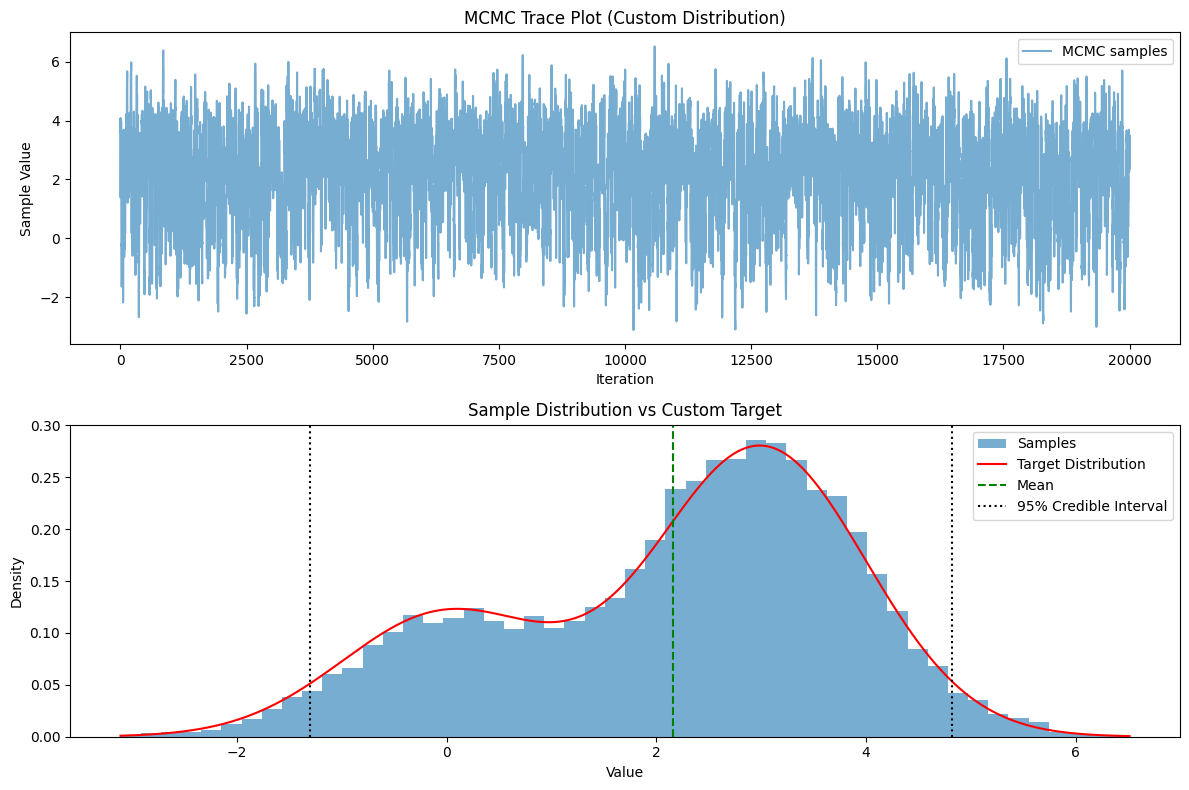

In [25]:
# Plot custom distribution results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(samples_custom, alpha=0.6, label='MCMC samples')
ax1.set_title('MCMC Trace Plot (Custom Distribution)')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Sample Value')
ax1.legend()

x = np.linspace(min(samples_custom), max(samples_custom), 1000)
target_values = [target_dist_custom(xi) for xi in x]

ax2.hist(samples_custom, bins=50, density=True, alpha=0.6, label='Samples')
ax2.plot(x, target_values, 'r-', label='Target Distribution')
ax2.axvline(mean, color='g', linestyle='--', label='Mean')
ax2.axvline(ci[0], color='k', linestyle=':', 
            label=f'{credible_interval*100:.0f}% Credible Interval')
ax2.axvline(ci[1], color='k', linestyle=':')
ax2.set_title('Sample Distribution vs Custom Target')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()